In [1]:
%env CUDA_VISIBLE_DEVICES=1

env: CUDA_VISIBLE_DEVICES=1


In [11]:
run ../src/wc_ratio_continuous.py

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from ssy_model import wc_loglinear_factory

In [4]:
from jax.config import config

# Tell JAX to use 64 bit floats
config.update("jax_enable_x64", True)

In [5]:
ssy = SSY()

# Test wc ratio

In [24]:
zs   = 30
hzs  = 30
hcs  = 30
hλs  = 30
std_devs = 5.0
w_init = jnp.ones(shape=(hλs, hcs, hzs, zs))

In [85]:
# mesh_grids = jnp.meshgrid(*build_grid(ssy, hλs, hcs, hzs, zs, std_devs), indexing='ij')
# x_flat = np.asarray([grid.ravel() for grid in mesh_grids])
# w_init = jnp.asarray([wc_loglinear(x_flat[:, i]) for i in range(x_flat.shape[1])]).reshape((hλs, hcs, hzs, zs))

## Successive evaluation

In [25]:
%%time

grids, out = wc_ratio_continuous(ssy, h_λ_grid_size=hλs, h_c_grid_size=hcs, 
                                 h_z_grid_size=hzs, z_grid_size=zs, 
                                 num_std_devs=std_devs, mc_draw_size=5000, 
                                 w_init=w_init, ram_free=20, tol=1e-5, write_to_file=True,
                                 filename='w_star_data.npy')

batch_size = 101250
Beginning iteration


iter = 0, error = 1.0101307575983505
iter = 10, error = 1.0975716559460977
iter = 20, error = 1.1637428858628844
iter = 30, error = 1.212265447673012
iter = 40, error = 1.2465654222663716
iter = 50, error = 1.269651035787028
iter = 60, error = 1.2839738962917409
iter = 70, error = 1.291450966693418
iter = 80, error = 1.2935514554829126
iter = 90, error = 1.2913942887922474
iter = 100, error = 1.2858330667851021
iter = 110, error = 1.2775194505748004
iter = 120, error = 1.266934903145085
iter = 130, error = 1.2543596208791996
iter = 140, error = 1.2396900490734595
iter = 150, error = 1.2218994393350613
iter = 160, error = 1.1977699214428128
iter = 170, error = 1.1595244690705613
iter = 180, error = 1.0920660048160755
iter = 190, error = 0.9746075994042371
iter = 200, error = 0.7963793008845812
iter = 210, error = 0.5816698128950009
iter = 220, error = 0.38349620949981045
iter = 230, error = 0.23853713673668153
iter = 240, error = 0.1475733630905

In [28]:
out

DeviceArray([[[[143.36136031, 144.67127613, 146.21770932, ...,
                193.50621803, 195.6972564 , 197.72589951],
               [143.36136031, 144.67127613, 146.21770932, ...,
                193.50621803, 195.6972564 , 197.72589951],
               [143.36136031, 144.67127613, 146.21770932, ...,
                193.50621803, 195.6972564 , 197.72589951],
               ...,
               [143.36136031, 144.67127613, 146.21770932, ...,
                193.50621803, 195.6972564 , 197.72589951],
               [143.36136031, 144.67127613, 146.21770932, ...,
                193.50621803, 195.6972564 , 197.72589951],
               [143.36136031, 144.67127613, 146.21770932, ...,
                193.50621803, 195.6972564 , 197.72589951]],

              [[141.45701013, 142.73629715, 144.24574774, ...,
                190.29125132, 192.42046284, 194.39104232],
               [141.45701013, 142.73629715, 144.24574774, ...,
                190.29125132, 192.42046284, 194.39104232],
  

## Anderson Acceleration

In [26]:
%%time

grids, out = wc_ratio_continuous(ssy, h_λ_grid_size=hλs, h_c_grid_size=hcs, 
                                 h_z_grid_size=hzs, z_grid_size=zs, 
                                 num_std_devs=std_devs, mc_draw_size=5000, 
                                 w_init=w_init, ram_free=20, tol=1e-5, algorithm="AA", 
                                 write_to_file=True, filename='w_star_data.npy')

batch_size = 101250
Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=0/1)>
Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=2/1)>
Iteration converged after 251 iterations
CPU times: user 9min 38s, sys: 244 ms, total: 9min 38s
Wall time: 9min 35s


In [27]:
out

DeviceArray([[[[143.36136031, 144.67127613, 146.21770932, ...,
                193.50621803, 195.6972564 , 197.72589951],
               [143.36136031, 144.67127613, 146.21770932, ...,
                193.50621803, 195.6972564 , 197.72589951],
               [143.36136031, 144.67127613, 146.21770932, ...,
                193.50621803, 195.6972564 , 197.72589951],
               ...,
               [143.36136031, 144.67127613, 146.21770932, ...,
                193.50621803, 195.6972564 , 197.72589951],
               [143.36136031, 144.67127613, 146.21770932, ...,
                193.50621803, 195.6972564 , 197.72589951],
               [143.36136031, 144.67127613, 146.21770932, ...,
                193.50621803, 195.6972564 , 197.72589951]],

              [[141.45701013, 142.73629715, 144.24574774, ...,
                190.29125132, 192.42046284, 194.39104232],
               [141.45701013, 142.73629715, 144.24574774, ...,
                190.29125132, 192.42046284, 194.39104232],
  

In [29]:
wc_func = construct_wstar_callable('w_star_data.npy')

In [19]:
wc_loglinear = wc_loglinear_factory(ssy)

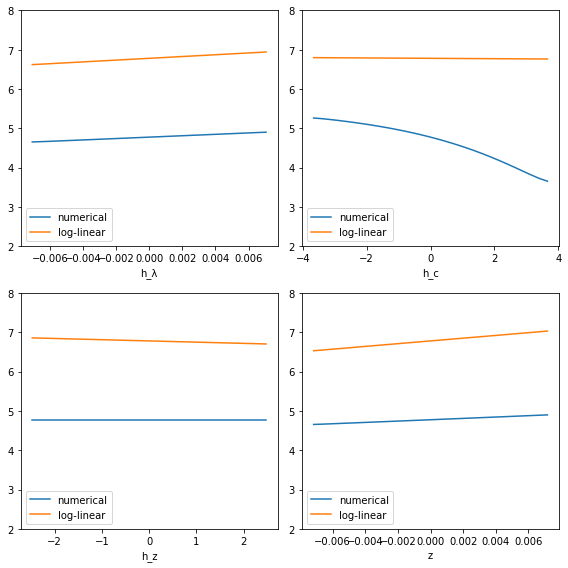

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))


titles = 'h_λ', 'h_c', 'h_z', 'z'

for pos, grid, title in zip(range(4), grids, titles):
    ax = axes.flatten()[pos]
    y1 = np.empty_like(grid)
    y2 = np.empty_like(grid)

    for i, val in enumerate(grid):
        x = np.zeros(4)
        x[pos] = val
        y1[i] = np.log(wc_func(x)) 
        y2[i] = wc_loglinear(x)

    ax.plot(grid, y1, label='numerical')
    ax.plot(grid, y2, label='log-linear')
    ax.set_xlabel(title)
    ax.set_ylim(2, 8)
    ax.legend(loc='lower left')

plt.tight_layout()
plt.show()

In [31]:
h_λ_grid, h_c_grid, h_z_grid, z_grid = grids

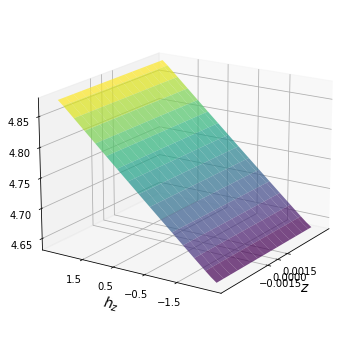

In [32]:
xg = z_grid
yg = h_z_grid
x, y = np.meshgrid(xg, yg)

z = out[int(hλs/2), int(hcs/2), :, :]


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,
                y,
                np.log(z.T),
                rstride=2, cstride=2,
                cmap=cm.viridis,
                alpha=0.7,
                linewidth=0.25)

ax.set_xlabel('$z$', fontsize=14)
ax.set_ylabel('$h_z$', fontsize=14)
ax.set_xticks((-0.0015, 0, 0.0015))
ax.set_yticks((-1.5, -0.5, 0.5, 1.5))

ax.view_init(18, -147)

plt.show()

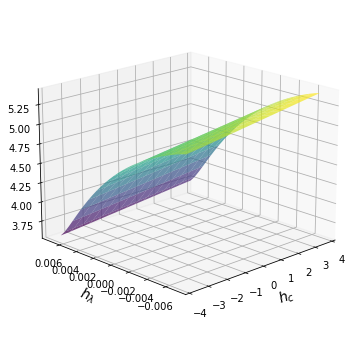

In [33]:
xg = h_c_grid
yg = h_λ_grid
x, y = np.meshgrid(xg, yg)

z = out[:, :, int(hzs/2), int(zs/2)]


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,
                y,
                np.log(z.T),
                rstride=2, cstride=2,
                cmap=cm.viridis,
                alpha=0.7,
                linewidth=0.25)
#ax.set_zlim(-0.5, 1.0)
ax.set_xlabel('$h_c$', fontsize=14)
ax.set_ylabel('$h_\lambda$', fontsize=14)
ax.view_init(18, -134)
plt.show()

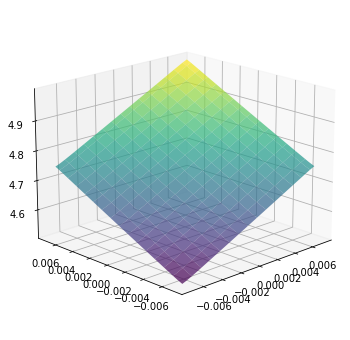

In [34]:
xg = z_grid
yg = h_λ_grid
x, y = np.meshgrid(xg, yg)

z = out[:, int(hcs/2), int(hzs/2), :]


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,
                y,
                np.log(z.T),
                rstride=2, cstride=2,
                cmap=cm.viridis,
                alpha=0.7,
                linewidth=0.25)
#ax.set_zlim(-0.5, 1.0)
ax.view_init(18, -134)
plt.show()

# Test Anderson Acceleration

In [6]:
import matplotlib.pyplot as plt

In [7]:
def get_batch_size(state_size, mc_draw_size, ram_free):
    batch_size = ram_free * 30000000 // mc_draw_size
    if state_size <= batch_size:
        batch_size = state_size
    else:
        while (state_size % batch_size > 0):
            batch_size -= 1
    return batch_size

In [362]:
zs   = 15
hzs  = 15
hcs  = 15
hλs  = 15
std_devs = 5.0
w_init = jnp.ones(shape=(hλs, hcs, hzs, zs))
mc_draw_size = 3000
seed = 1234

In [363]:
batch_size = get_batch_size(zs*hzs*hcs*hλs, mc_draw_size=5000, ram_free=10)

In [364]:
ssy_params = jnp.array(ssy.unpack())
grids = build_grid(ssy, hλs, hcs, hzs, zs, std_devs)

# generate shocks to evaluate the inner expectation
key = jax.random.PRNGKey(seed)
mc_draws = jax.random.normal(key, shape=(4, mc_draw_size))

In [365]:
params = ssy_params, grids, mc_draws
T = fun_factory(params, batch_size=batch_size)

In [366]:
w_init = jnp.zeros(shape=(hλs, hcs, hzs, zs)) 

## Define some functions

In [15]:
# one dimension for jax
def get_c(AR_series, m, offset):
    U = jnp.empty((m+1, m+1))
    for j in range(m):
        for i in range(m+1):
            U = U.at[j, i].set(AR_series[offset + 1 + i + j] - AR_series[offset + i + j])
    U = U.at[m, :].set(1.0)
    rhs = jnp.zeros(m+1)
    rhs = rhs.at[-1].set(1.0)
    c = jnp.linalg.solve(U, rhs)
    return c

get_c = jax.jit(get_c, static_argnames=('m'))
get_c_vmap = jax.vmap(get_c, in_axes=(1, None, None), out_axes=(1))

dot_vmap = jax.vmap(jnp.dot, in_axes=(1))

In [132]:
def AA_solver(f, w_init, m = 2, tol=1e-7, max_iter=10000, print_skip=10, verbose=True):
    def build_list(w_in):
        # initialization
        # store results of 2m+1 iterations
        w_flat_list = []
        w_in = w_init
        for i in range(2 * m + 1):
            w_out = f(w_in)
            w_flat_list.append(w_out.ravel())
            w_in = w_out
        return w_flat_list, w_out

    w_flat_list, w_in = build_list(w_init)
    # get one extrapolated array
    w_flat_array = jnp.asarray(w_flat_list)
    w_est = dot_vmap(get_c_vmap(w_flat_array, m, 0), w_flat_array[0:m+1])
    
    # start the iteration
    error_aa = tol + 1.0
    i = 2*m
    while error_aa > tol and i < max_iter:
        w_out = f(w_in)
        w_flat_list.pop(0)
        w_flat_list.append(w_out.ravel())
        error = jnp.max(jnp.abs(w_in - w_out))
        w_in = w_out

        w_flat_array = jnp.asarray(w_flat_list)
        w_est_new = dot_vmap(get_c_vmap(w_flat_array, m, 0), w_flat_array[0:m+1])
        error_aa = jnp.max(jnp.abs(w_est - w_est_new))
        w_est = w_est_new
        if verbose and i % print_skip == 0:
            print("Error = {}; Error (AA) = {}".format(error, error_aa))
        i += 1

    if i == max_iter:
        print(f"Warning: Hit maximum iteration number {max_iter}")
    else:
        print(f"Iteration converged after {i} iterations") 
    return w_est, i


In [367]:
%%time
w_est = AA_solver(lambda x: T(x, params), w_init, m=3, tol=1e-5)

Error = 1.0973630088331028; Error (AA) = 1377539.6901346184
Error = 1.1625393343040713; Error (AA) = 741668.3405354228
Error = 1.209028814014907; Error (AA) = 137803346.9605298
Error = 1.2401170966190307; Error (AA) = 357301.51064739376
Error = 1.258846923637492; Error (AA) = 239200.5285673365
Error = 1.2677436661577701; Error (AA) = 1610940.2086258717
Error = 1.2684571953108588; Error (AA) = 410362.26981731504
Error = 1.2601610176071176; Error (AA) = 741731.6916464642
Error = 1.2330105631909873; Error (AA) = 420700.7690184042
Error = 1.150824847963051; Error (AA) = 520.4163593417034
Error = 0.9458490570547156; Error (AA) = 29.41869370022323
Error = 0.6289183165537224; Error (AA) = 10.079685190692544
Error = 0.36083925934761396; Error (AA) = 58.30227117636241
Error = 0.2117444059388447; Error (AA) = 4.746407000347972
Error = 0.1362908962489655; Error (AA) = 1.5386322231497616
Error = 0.09387584517062919; Error (AA) = 6.961772953392938
Error = 0.06684303146644766; Error (AA) = 0.1523706

In [368]:
%%time
w_out = fwd_solver(lambda x: T(x, params), w_init, tol=1e-6)

Beginning iteration


iter = 0, error = 1.0
iter = 10, error = 1.0896924602437288
iter = 20, error = 1.156916927745126
iter = 30, error = 1.2051263844068956
iter = 40, error = 1.2376112479625903
iter = 50, error = 1.2574530618758075
iter = 60, error = 1.2672392555907095
iter = 70, error = 1.2687418717051884
iter = 80, error = 1.261547529821982
iter = 90, error = 1.2372893885202387
iter = 100, error = 1.163418692288161
iter = 110, error = 0.9731023069464584
iter = 120, error = 0.6612371698564914
iter = 130, error = 0.38199936175834637
iter = 140, error = 0.22242499684213612
iter = 150, error = 0.14190100918889925
iter = 160, error = 0.09725234691492801
iter = 170, error = 0.06909437111724515
iter = 180, error = 0.04984639480068154
iter = 190, error = 0.03618632570061209
iter = 200, error = 0.02633910849490917
iter = 210, error = 0.019194293372066795
iter = 220, error = 0.013995524525142855
iter = 230, error = 0.01020767650709331
iter = 240, error = 0.007445958720268209
iter = 250, error

In [369]:
%%time
w_accurate = fwd_solver(lambda x: T(x, params), w_init, tol=1e-11)

Beginning iteration


iter = 0, error = 1.0
iter = 10, error = 1.0896924602437288
iter = 20, error = 1.156916927745126
iter = 30, error = 1.2051263844068956
iter = 40, error = 1.2376112479625903
iter = 50, error = 1.2574530618758075
iter = 60, error = 1.2672392555907095
iter = 70, error = 1.2687418717051884
iter = 80, error = 1.261547529821982
iter = 90, error = 1.2372893885202387
iter = 100, error = 1.163418692288161
iter = 110, error = 0.9731023069464584
iter = 120, error = 0.6612371698564914
iter = 130, error = 0.38199936175834637
iter = 140, error = 0.22242499684213612
iter = 150, error = 0.14190100918889925
iter = 160, error = 0.09725234691492801
iter = 170, error = 0.06909437111724515
iter = 180, error = 0.04984639480068154
iter = 190, error = 0.03618632570061209
iter = 200, error = 0.02633910849490917
iter = 210, error = 0.019194293372066795
iter = 220, error = 0.013995524525142855
iter = 230, error = 0.01020767650709331
iter = 240, error = 0.007445958720268209
iter = 250, error

In [370]:
np.max(np.abs(w_out[0].ravel() - w_accurate[0].ravel()))

3.035261573813841e-05

In [378]:
np.max(np.abs(w_est[0].ravel() - w_accurate[0].ravel()))

2.3046421517847193e-06

In [372]:
np.max(np.abs(w_out[0].ravel() - w_est[0].ravel()))

3.0328425481229715e-05

# Test Jax's AA Algorithm

In [56]:
import jaxopt

In [386]:
AA = jaxopt.AndersonAcceleration(lambda x: T(x, params), verbose=True, mixing_frequency=5, tol=1e-5,
                                 maxiter=500, history_size=2, beta=8.0, implicit_diff=False, ridge=1e-5, jit=True, unroll=True)
AA

AndersonAcceleration(fixed_point_fun=<function <lambda> at 0x7f934f048700>, history_size=2, mixing_frequency=5, beta=8.0, maxiter=500, tol=1e-05, ridge=1e-05, verbose=True, implicit_diff=False, implicit_diff_solve=None, jit=True, unroll=True)

In [387]:
%%time
out = AA.run(w_init)

Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=0/1)>
Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=2/1)>
CPU times: user 19 s, sys: 116 ms, total: 19.1 s
Wall time: 17.5 s


In [382]:
print(np.max(np.abs(w_accurate[0]-out[0])), "iter_num =", out[1].iter_num)

3.899970721477075e-06 iter_num = 185


In [292]:
np.max(np.abs(w_est[0]-w_accurate[0].ravel()))

4.302469235994977e-06